<a href="https://colab.research.google.com/github/benstaf/ChatGPT-Next-Web/blob/main/Copy_of_RetinaFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install retina-face

In [2]:
#Import Retinaface, CV2 and Matplotlib
from retinaface import RetinaFace
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!cp -r "/content/drive/My Drive/Instagram_screenshots"/* /content/

In [ ]:
!ls -lh /content/

total 13M
drwx------ 5 root root 4.0K Aug  2 13:18 drive
drwxr-xr-x 1 root root 4.0K Jul 29 13:36 sample_data
-rw------- 1 root root 941K Aug  2 13:18 Screenshot_2025-08-02-08-27-18-603_com.instagram.android.jpg
-rw------- 1 root root 992K Aug  2 13:18 Screenshot_2025-08-02-08-35-12-241_com.instagram.android.jpg
-rw------- 1 root root 914K Aug  2 13:18 Screenshot_2025-08-02-08-36-13-796_com.instagram.android.jpg
-rw------- 1 root root 918K Aug  2 13:18 Screenshot_2025-08-02-08-36-50-724_com.instagram.android.jpg
-rw------- 1 root root 1.2M Aug  2 13:18 Screenshot_2025-08-02-08-57-57-949_com.instagram.android.jpg
-rw------- 1 root root 1.2M Aug  2 13:18 Screenshot_2025-08-02-09-15-40-385_com.instagram.android.jpg
-rw------- 1 root root 857K Aug  2 13:18 Screenshot_2025-08-02-09-15-50-178_com.instagram.android.jpg
-rw------- 1 root root 850K Aug  2 13:18 Screenshot_2025-08-02-09-19-15-123_com.instagram.android.jpg
-rw------- 1 root root 791K Aug  2 13:18 Screenshot_2025-08-02-09-21-04-31

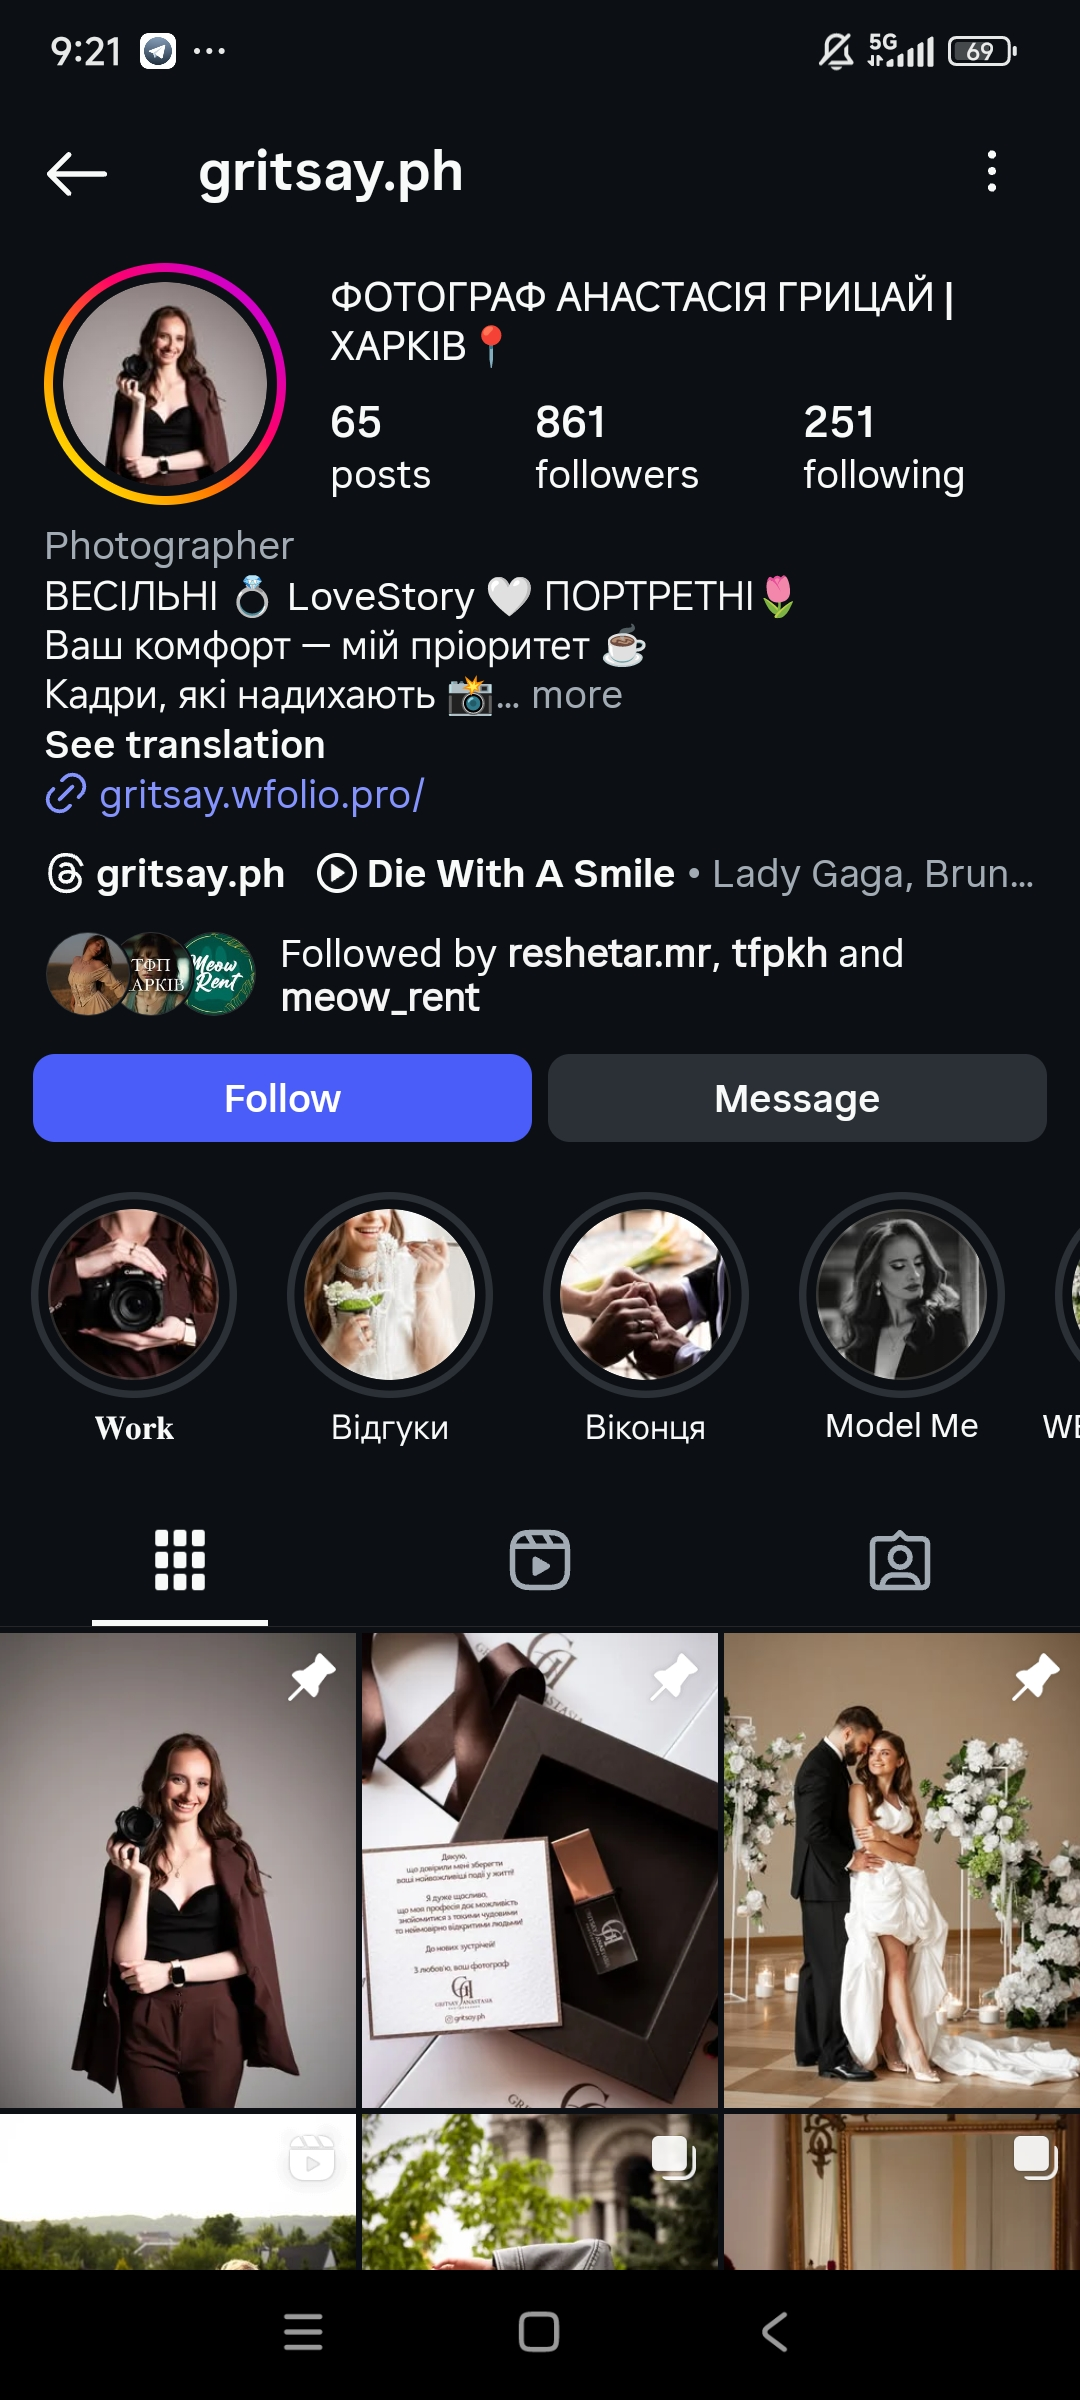

In [12]:
#Read and display the image
img = cv2.imread('/content/testimage4.jpg')
cv2_imshow(img)

In [ ]:
#Detect faces using RetinaFace
img_faces = RetinaFace.detect_faces(img)

Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5


25-08-02 13:19:21 - Directory /root/.deepface created
25-08-02 13:19:21 - Directory /root/.deepface/weights created
25-08-02 13:19:21 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


100%|██████████| 119M/119M [00:00<00:00, 205MB/s]


In [ ]:
#Iterate all objects key areas
for i in img_faces.keys():
  choose = img_faces[i]
  print(choose)

{'score': np.float64(0.9996270537376404), 'facial_area': [np.int64(763), np.int64(1371), np.int64(838), np.int64(1486)], 'landmarks': {'right_eye': [np.float32(793.4989), np.float32(1417.3666)], 'left_eye': [np.float32(826.34204), np.float32(1421.925)], 'nose': [np.float32(813.4643), np.float32(1441.3087)], 'mouth_right': [np.float32(789.8567), np.float32(1454.6912)], 'mouth_left': [np.float32(818.5312), np.float32(1458.7244)]}}
{'score': np.float64(0.9996045231819153), 'facial_area': [np.int64(914), np.int64(1919), np.int64(944), np.int64(1955)], 'landmarks': {'right_eye': [np.float32(934.2847), np.float32(1935.7938)], 'left_eye': [np.float32(939.3227), np.float32(1937.2104)], 'nose': [np.float32(937.7424), np.float32(1944.9105)], 'mouth_right': [np.float32(927.8231), np.float32(1948.0166)], 'mouth_left': [np.float32(930.5817), np.float32(1949.5359)]}}
{'score': np.float64(0.9993969202041626), 'facial_area': [np.int64(99), np.int64(2073), np.int64(212), np.int64(2213)], 'landmarks': {

In [ ]:
#Iterate all objects key areas and mark only face area
for i in img_faces.keys():
  facial_parts = img_faces[i]
  #print(choose)
  recognize_face_area = facial_parts["facial_area"]
  cv2.rectangle(img, (recognize_face_area[2], recognize_face_area[3]), (recognize_face_area[0], recognize_face_area[1]), (255, 255, 255), 1)

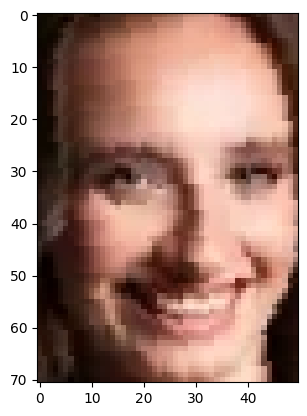

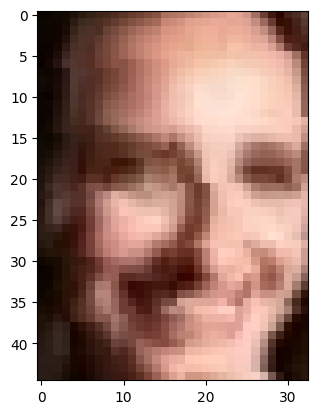

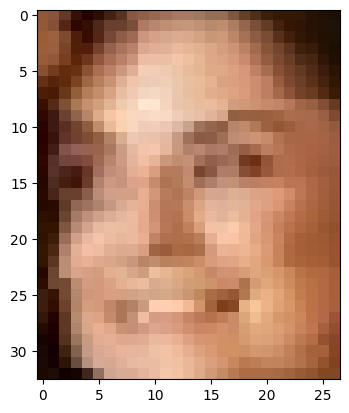

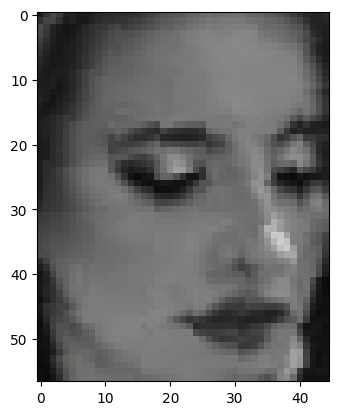

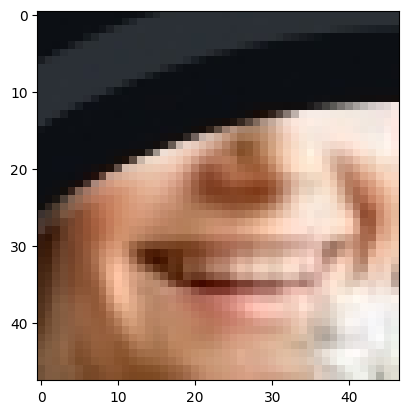

In [13]:
#Extract individual faces from the image
import matplotlib.pyplot as plt
ext_faces = RetinaFace.extract_faces(img_path = "/content/testimage4.jpg", align = True)
for face in ext_faces:
  if face.size > 0: # Check if the extracted face is not empty
    plt.imshow(face)
    plt.show()
  else:
    print("Skipping empty face.") # Optional: print a message for empty faces

In [ ]:
!pip install transformers --quiet
from transformers import AutoImageProcessor, AutoModelForImageClassification
from PIL import Image
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

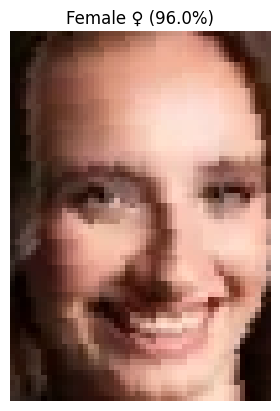

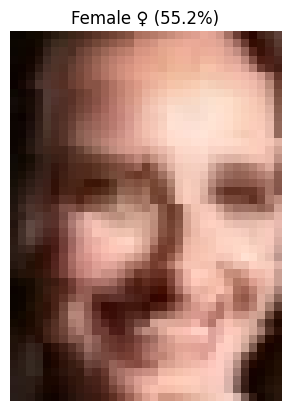

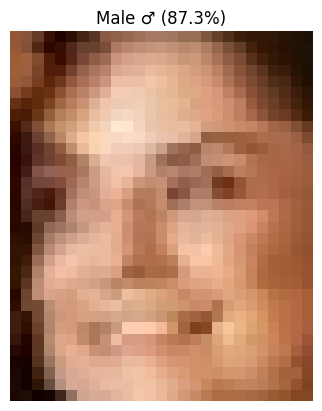

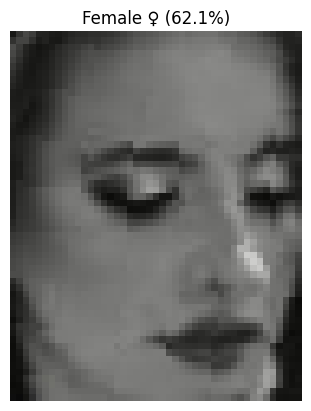

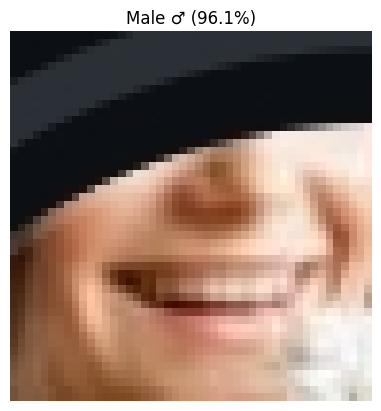


✅ Verdict: At least one male detected.


In [14]:
from transformers import AutoImageProcessor, AutoModelForImageClassification
from PIL import Image
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Load model and processor
model = AutoModelForImageClassification.from_pretrained("prithivMLmods/Gender-Classifier-Mini")
processor = AutoImageProcessor.from_pretrained("prithivMLmods/Gender-Classifier-Mini")

# Store results
results = []

# Classify each face
for i, face in enumerate(ext_faces):
    if face.size == 0:
        print(f"Skipping empty face {i}")
        continue

    # Convert to PIL
    face_pil = Image.fromarray(np.uint8(face)).convert("RGB")

    # Preprocess and classify
    inputs = processor(images=face_pil, return_tensors="pt")
    with torch.no_grad():
        logits = model(**inputs).logits
        probs = F.softmax(logits, dim=1)
        pred = torch.argmax(probs).item()
        confidence = probs[0][pred].item()
        label = model.config.id2label[pred]

    # Store prediction
    results.append({
        "face_index": i,
        "label": label,
        "confidence": confidence,
        "image": face_pil
    })

    # Show face and prediction
    plt.imshow(face_pil)
    plt.title(f"{label} ({confidence:.1%})")
    plt.axis('off')
    plt.show()

# Final verdict after all faces are processed
found_male = any("male" in r["label"].lower() and r["confidence"] > 0.9 for r in results)

print("\n✅ Verdict:", "At least one male detected." if found_male else "Only female faces detected.")

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/372M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Face 0: Male ♂ (91.90% confidence)


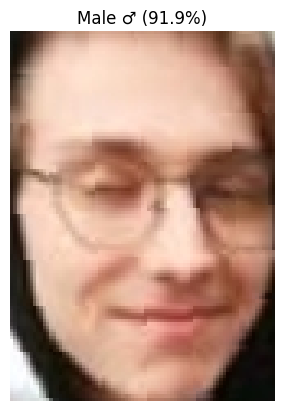

Face 1: Female ♀ (98.78% confidence)


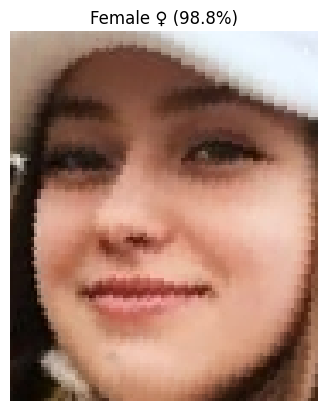

Face 2: Male ♂ (95.78% confidence)


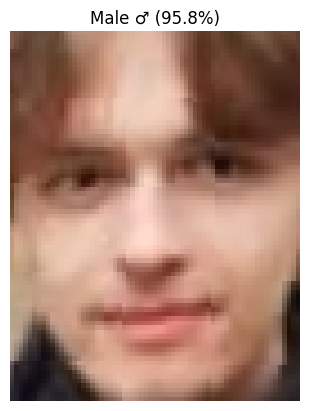

Face 3: Male ♂ (66.14% confidence)


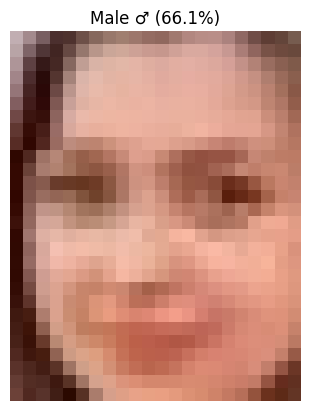

Face 4: Male ♂ (82.79% confidence)


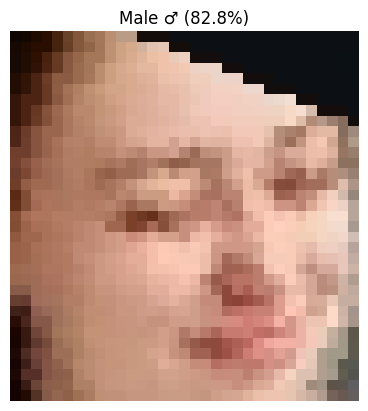

Face 5: Female ♀ (91.24% confidence)


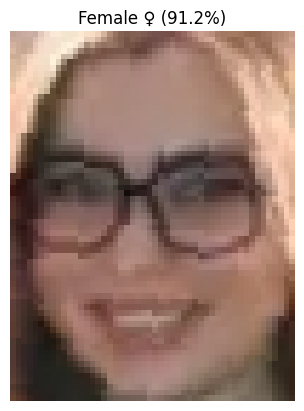

Face 6: Female ♀ (65.60% confidence)


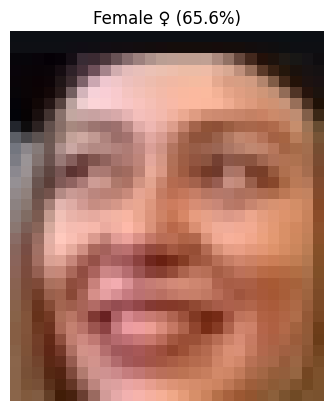

Face 7: Female ♀ (99.26% confidence)


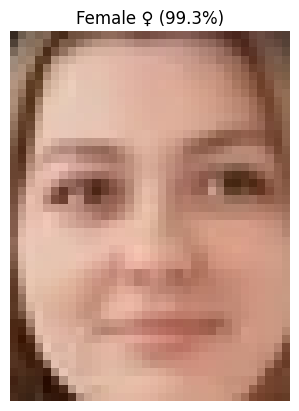

Face 8: Female ♀ (93.16% confidence)


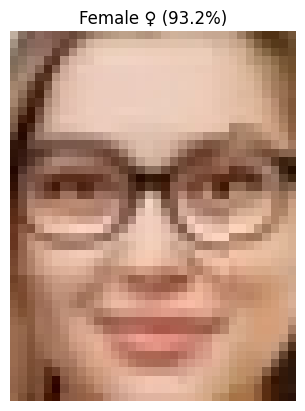

Face 9: Male ♂ (59.46% confidence)


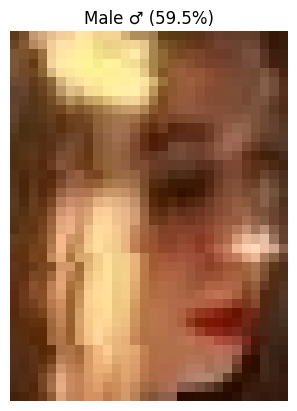

Face 10: Female ♀ (99.06% confidence)


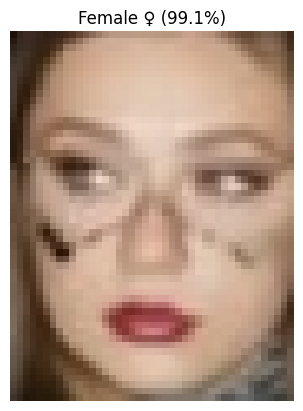

Skipping empty face 11
Face 12: Male ♂ (88.04% confidence)


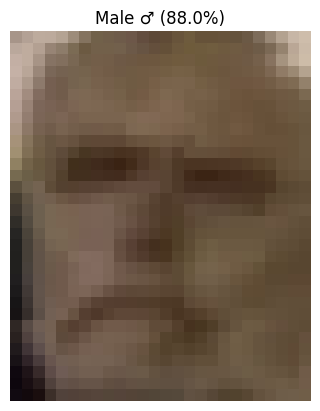

Face 13: Male ♂ (75.80% confidence)


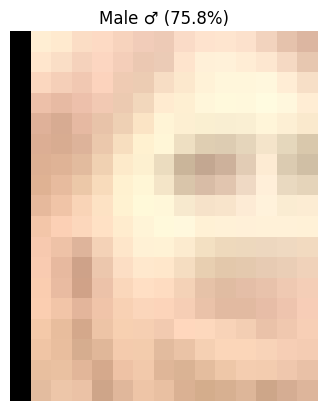

In [ ]:


# Load a gender classification model (SigLIP-based, very accurate)
model = AutoModelForImageClassification.from_pretrained("prithivMLmods/Gender-Classifier-Mini")
processor = AutoImageProcessor.from_pretrained("prithivMLmods/Gender-Classifier-Mini")

# Run each face through the classifier
for i, face in enumerate(ext_faces):
    if face.size == 0:
        print(f"Skipping empty face {i}")
        continue

    # Convert NumPy face (from RetinaFace) to PIL Image
    face_pil = Image.fromarray(np.uint8(face)).convert("RGB")

    # Preprocess and predict
    inputs = processor(images=face_pil, return_tensors="pt")
    with torch.no_grad():
        logits = model(**inputs).logits
        probs = F.softmax(logits, dim=1)
        pred = torch.argmax(probs).item()
        confidence = probs[0][pred].item()
        label = model.config.id2label[pred]

    # Show result
    print(f"Face {i}: {label} ({confidence:.2%} confidence)")
    plt.imshow(face_pil)
    plt.title(f"{label} ({confidence:.1%})")
    plt.axis('off')
    plt.show()